In [14]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.datasets import fashion_mnist
from keras.layers import Flatten, Dense, Dropout
from keras.models import Sequential

In [15]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [16]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [17]:
X_valid, X_train = X_train[:5000] / 255.0, X_train[5000:] / 255.0
y_valid, y_train = y_train[:5000], y_train[5000:]

X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)
X_valid = X_valid.reshape(-1, 784)

In [18]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=[784,]))
model.add(Dropout(0,2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0,2))
model.add(Dense(10, activation='softmax'))

In [19]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=512,
    validation_data=(X_valid, y_valid)
)

Epoch 1/100


2023-08-06 12:16:25.790937: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 172480000 exceeds 10% of free system memory.


108/108 [==============================] - 1s 6ms/step - loss: 0.7054 - accuracy: 0.7618 - val_loss: 0.4704 - val_accuracy: 0.8326
Epoch 2/100
108/108 [==============================] - 1s 5ms/step - loss: 0.4394 - accuracy: 0.8465 - val_loss: 0.4104 - val_accuracy: 0.8580
Epoch 3/100
108/108 [==============================] - 1s 5ms/step - loss: 0.3932 - accuracy: 0.8624 - val_loss: 0.3954 - val_accuracy: 0.8590
Epoch 4/100
108/108 [==============================] - 1s 5ms/step - loss: 0.3739 - accuracy: 0.8664 - val_loss: 0.3801 - val_accuracy: 0.8624
Epoch 5/100
108/108 [==============================] - 1s 6ms/step - loss: 0.3540 - accuracy: 0.8733 - val_loss: 0.3726 - val_accuracy: 0.8666
Epoch 6/100
108/108 [==============================] - 1s 6ms/step - loss: 0.3325 - accuracy: 0.8825 - val_loss: 0.3361 - val_accuracy: 0.8762
Epoch 7/100
108/108 [==============================] - 1s 6ms/step - loss: 0.3203 - accuracy: 0.8849 - val_loss: 0.3266 - val_accuracy: 0.8804
Epoch 8/100

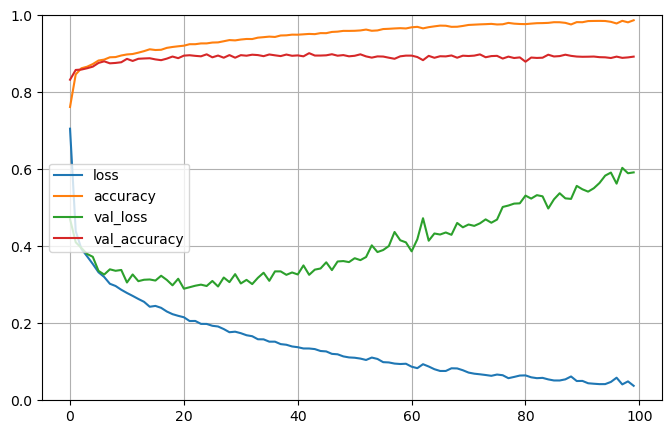

In [22]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

313/313 [==============================] - 0s 1ms/step


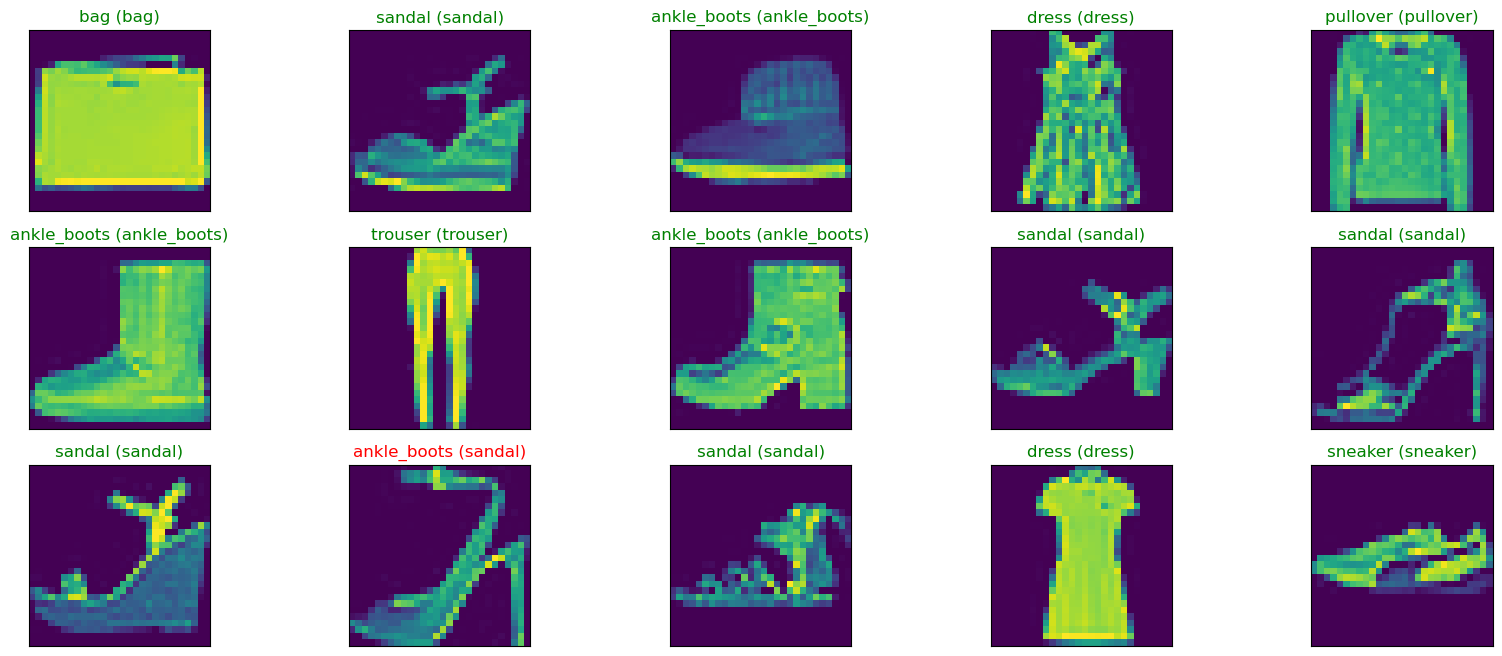

In [23]:
fashion_mnist_labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat',
          'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']
y_hat = model.predict(X_test)
X_test = X_test.reshape(10000, 28, 28)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(X_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = y_test[index]
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

In [ ]:
# Висновок: чим більше епох, тим краще потім результат. При 50-60 епохах в середньому було 2-3 помилки. При 100 епохах - 1 одна помилка.